In [2]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import *
import pickle
import csv
from sklearn.metrics import accuracy_score

In [3]:
# Import dataset

dataset = pd.read_csv("bike_sharing.csv")
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
dataset = dataset.loc[:,['temp','cnt']]
dataset.dtypes

temp    float64
cnt       int64
dtype: object

In [6]:
# Divide data into features and label

y_data_set = np.array(pd.DataFrame(dataset.temp))
x_data_set = np.array(dataset["cnt"])

In [7]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x_data_set.reshape(-1, 1) )
y = sc_y.fit_transform(y_data_set.reshape(-1, 1) )

In [26]:
print("shape of x data",x.shape)
print("shape of y data",y.shape)

shape of x data (17379, 1)
shape of y data (17379, 1)


In [27]:
os.mkdir("CSV")
# def csv_file(x_train_data,y_train_data,file_name):
#     #load data to csv file
#     myData = x_train_data
   
#     myFile = open('CSV_file/'+file_name, 'w')  
#     with myFile:
#         writer = csv.writer(myFile)
#         writer.writerows(myData)
   
#     colnames=['x'] 
#     df = pd.read_csv('CSV_file/'+file_name, names=colnames, header=None)
#     # inserting column with static value in data frame 
#     df.insert(1, "y", y_train_data)
   
#     df.to_csv('CSV_file/'+file_name, index =  False)

In [28]:
# def splitdata(x, y):
    
#     x_train_data,x_test_data,y_train_data,y_test_data = train_test_split(x,y,test_size = 20, random_state=0)
    
#     csv_file(x_test_data,y_test_data,'test_data.csv')

#     x_train_data, x_cv_data, y_train_data, y_cv_data = train_test_split(x_train_data,y_train_data,test_size = 0.40,random_state=0)
    
#     csv_file(x_train_data,y_train_data,'train_data.csv')
#     csv_file(x_cv_data,y_cv_data,'cv_data.csv') 
# #     return x_train_data,x_test_data,y_train_data,y_test_data,x_cv_data,y_cv_data
# splitdata(x, y)

In [29]:
def splitdata(dataset):
    # split train and test data
    train, test = train_test_split(dataset,test_size = 0.35, random_state=0)
    print("train : ", train.shape, " test : ", test.shape)
    #     print("y_train : ", y_train.shape, " y_test : ", y_test.shape)
    
    # saving datasets into csv files
    test.to_csv('CSV/test_file.csv',index=False,encoding='utf-8')
    
    
    # divide train data into train and cross validation 
    train_data, crossV_data = train_test_split(train,test_size = 0.40,random_state=0)
    
    train_data.to_csv('CSV/train_file.csv',index=False,encoding='utf-8')
    crossV_data.to_csv('CSV/crossV_file.csv',index=False,encoding='utf-8')
   
    
    
    print("train_data : ", train_data.shape, " crossV_data : ", crossV_data.shape)
    
    #     return x_train_data, x_cv, y_train_data, y_cv 

splitdata(dataset)

train :  (11296, 2)  test :  (6083, 2)
train_data :  (6777, 2)  crossV_data :  (4519, 2)


In [30]:
dataset1 = pd.read_csv("CSV_file/train_data.csv")

dataset1.shape

(10415, 2)

In [31]:
dataset.min()

temp    0.02
cnt     1.00
dtype: float64

In [32]:
# Handle Missing data
def handle_min_values(dataset):
    # replace min values by mean
    dataset.replace(0, dataset.mean(), inplace=True)
    return dataset

dataset = handle_min_values(dataset)

In [33]:
print("x_train shape",x.shape)
print("y_train shape",y.shape)

x_train shape (17379, 1)
y_train shape (17379, 1)


In [34]:
# regressor = SVR(kernel= 'rbf')
# regressor.fit(x,y)


 Regressor :  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


 Prediction 

 

 prediction of y train data :  [-0.57082912 -0.61478852 -0.60356528 ... -0.52774916 -0.61573166
 -0.62093886]


 ACCURACY 



 Accuracy train data acc_r2 :  81.94857963782383

 Accuracy train data median_ab_error :  69.43292101485514

 visualising using SVR 
 


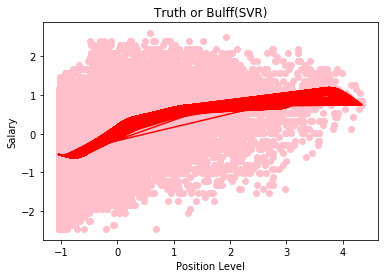


 visualising Regression Model 
 


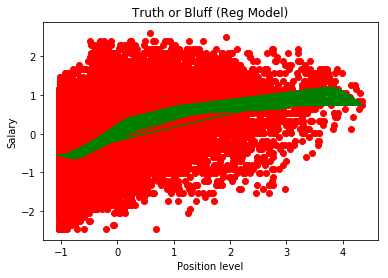

In [42]:
class Support_Vector_Regression:
    
    # fitting Support_Vector_Regression to the training set
    
    def model_train(self,x,y):  
        regressor = SVR(kernel= 'rbf')
        regressor.fit(x,y)
        return regressor
    
    # dump train model pickle file
    
    def pickel_file(self,regressor):
        
       
        file = open('trainmodel.pkl', 'wb')
        pickle.dump(regressor,file)
        file.close()
    
    # predicting the test set result and train set result
    
    def prediction(self,x,regressor):
        print("\n\n Prediction \n\n ")
        # prediction for only 6.5
#         y_pred_train = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
        
        # prediction for all data x
        y_pred_train = regressor.predict(x)
        return y_pred_train

    # Accuracy for train and test
    
    
    def accuracy(self,y,y_pred_train):
        

        print("\n\n ACCURACY \n\n")

        # acc using r2
        error = r2_score(y, y_pred_train)      
        acc_r2 = (1-error)*100
       
        # using median_ab_error
        median_ab_error = median_absolute_error(y, y_pred_train)*100
        return acc_r2, median_ab_error
        

    
    
    # visualising the training set results

    def plotting(self,x, y,regressor):
        print("\n visualising using SVR \n ")
        plt.scatter(x, y , color = 'pink')
        plt.plot(x, regressor.predict(x), color = 'red')
        plt.title("Truth or Bulff(SVR)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
        
        print("\n visualising Regression Model \n ")
        plt.scatter(x, y, color ='red')
        plt.plot(x, regressor.predict(x), color ='green')
        plt.title('Truth or Bluff (Reg Model)')
        plt.xlabel('Position level')
        plt.ylabel('Salary')
        plt.show()
 
        
def main(dataset,x,y):
    
    object_SVM = Support_Vector_Regression()
    
    regressor = object_SVM.model_train(x,y)
    print("\n Regressor : ", regressor)
    
    object_SVM.pickel_file(regressor)
    
  
    
    y_pred_train = object_SVM.prediction(x,regressor)
    print("\n prediction of y train data : ",y_pred_train)
    
    acc_r2,median_ab_error = object_SVM.accuracy(y,y_pred_train)
    print("\n Accuracy train data acc_r2 : ", acc_r2)
    print("\n Accuracy train data median_ab_error : ",  median_ab_error)
    
    
    
    
    object_SVM.plotting(x,y,regressor)
    
    
    
    
    
main(dataset,x,y)
    
